Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [102]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout

import matplotlib.pyplot as plt


import warnings
warnings.simplefilter("ignore")

In [103]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                  num_words=10000,
                                                  skip_top=0,
                                                  maxlen=None,
                                                  seed=113,
                                                  start_char=1,
                                                  oov_char=2,
                                                  index_from=3) 

In [104]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


Набор из 25 000 отзывов о фильмах из IMDB, помеченных сентиментальностью (положительный/отрицательный). Отзывы были препроцессированы, и каждый отзыв закодирован как последовательность индексов слов (целых чисел). Для удобства, слова индексируются по общей частоте в наборе данных, так что, например, целое число «3» кодирует 3-е наиболее часто встречающееся слово в данных. 

In [219]:
# word_to_id.items()

In [78]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [79]:
# maxi = 0
# mini = 25000
# for i in range(25000):
#     if len(x_train[i])>maxi:
#         maxi = len(x_train[i])
#     if len(x_train[i])<mini:
#         mini = len(x_train[i])
# print(maxi)
# print(mini)

2494
11


Для дальнейшей обработки необходимо входные сигналы к одному размеру 

In [105]:
# Последовательность пэдов одинаковой длины
padded_inputs = pad_sequences(x_train, maxlen=100, value = 0.0) # 0.0 так как это соответствует <PAD>
padded_inputs_test = pad_sequences(x_test, maxlen=100, value = 0.0) # 0.0 because it corresponds with <PAD>

In [106]:
for i in np.random.randint(0, len(padded_inputs), 3):
    INDEX_FROM=3   # смещение индекса слов
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2
    word_to_id["<UNUSED>"] = 3
    
    id_to_word = {value:key for key,value in word_to_id.items()}
    print('=================================================')
    print(f'Образец = {i} | Длина = {len(padded_inputs[i])}')
    print('=================================================')
    print(' '.join(id_to_word[id] for id in padded_inputs[i] ))

Образец = 24399 | Длина = 100
to fight over either luke wilson or the equally vapid <UNK> in this movie the female actresses are very cute and that's the only reason to watch this movie i suppose it is <UNK> that <UNK> even <UNK> <UNK> <UNK> friend is around but well that is what we get br br neither of the female leads would ever ever talk to any of the males in this movie for more than 5 minutes what we get is them <UNK> and crying and fighting and so on over 2 guys that were best described in friday the 13th 4 dead
Образец = 5704 | Длина = 100
consider myself a <UNK> kinski fan she is certainly <UNK> and exotic but she's outside her range with this br br alexandra paul is <UNK> overwrought every line she delivers is with three <UNK> points someone must have directed her to scream at all costs why would michael des <UNK> want to have sex with such a raging <UNK> br br finally <UNK> arquette as the sweet <UNK> wife comes off okay and probably the most believable of the bunch but that 

**Строим сеть**

Стартовая модель - копия модели с урока 3

In [115]:
first_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2)
])

first_model.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False, 
                                                             label_smoothing=0,
                                                             name='binary_crossentropy'),
                    metrics=['accuracy'])



first_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 258       
Total params: 13,186
Trainable params: 13,186
Non-trainable params: 0
_________________________________________________________________


In [116]:
first_history = first_model.fit(padded_inputs, y_train,
                                epochs=100,
                                batch_size=2000,
                                validation_split=0.2)

test_loss, test_acc = first_model.evaluate(padded_inputs_test,  y_test)

print('\nTest accuracy:', test_acc)

Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 7.7766 - accuracy: 0.4981 - val_loss: 7.6449 - val_accuracy: 0.5018
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 7.7007 - accuracy: 0.4941 - val_loss: 7.6270 - val_accuracy: 0.5036
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 7.7850 - accuracy: 0.4900 - val_loss: 7.5890 - val_accuracy: 0.5036
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 7.6345 - accuracy: 0.4987 - val_loss: 7.6481 - val_accuracy: 0.5058
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 7.6986 - accuracy: 0.4904 - val_loss: 7.6203 - val_accuracy: 0.5048
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 7.6157 - accuracy: 0.4975 - val_loss: 7.6402 - val_accuracy: 0.5056
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 7.6758 - accuracy: 0.4894 - val_loss: 7.5841 - val_accuracy: 0.5054
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 40ms/step - loss: 7.6289 - accuracy: 0.4990 - val_loss: 7.6471 - val_accuracy: 0.5060
Epoch 60/100
10/10 [==============================] - 0s 5ms/step - loss: 7.6331 - accuracy: 0.4995 - val_loss: 7.6427 - val_accuracy: 0.5060
Epoch 61/100
10/10 [==============================] - 0s 5ms/step - loss: 7.6200 - accuracy: 0.4980 - val_loss: 7.6755 - val_accuracy: 0.5064
Epoch 62/100
10/10 [==============================] - 0s 5ms/step - loss: 7.6416 - accuracy: 0.4933 - val_loss: 7.6755 - val_accuracy: 0.5066
Epoch 63/100
10/10 [==============================] - 0s 5ms/step - loss: 7.6404 - accuracy: 0.4953 - val_loss: 7.6380 - val_accuracy: 0.5060
Epoch 64/100
10/10 [==============================] - 0s 5ms/step - loss: 7.6462 - accuracy: 0.5005 - val_loss: 7.6158 - val_accuracy: 0.5058
Epoch 65/100
10/10 [==============================] - 0s 5ms/step - loss: 7.6313 - accuracy: 0.4935 - val_loss: 7.5933 - val_accuracy: 0.5044
Epoch

**Вывод** точность модели 0,5, что можно сравнить с простым подбрасыванеим монетки.
Вероятно, это происходит, потому что данные не нормированы, не предобработаны (кроме длины пэда).

Добавим слой Эмбедингов (Преобразовывает положительные целые числа (индексы) в плотные (dense) векторы фиксированного размера)

In [152]:
second_model = keras.Sequential([
    keras.layers.Embedding(10000, input_length=100, output_dim=15),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2)
])

second_model.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False, 
                                                             label_smoothing=0,
                                                             name='binary_crossentropy'),
                    metrics=['accuracy'])



second_model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 100, 15)           150000    
_________________________________________________________________
flatten_27 (Flatten)         (None, 1500)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 128)               192128    
_________________________________________________________________
dense_93 (Dense)             (None, 2)                 258       
Total params: 342,386
Trainable params: 342,386
Non-trainable params: 0
_________________________________________________________________


In [153]:
second_history = second_model.fit(padded_inputs, y_train,
                                epochs=100,
                                batch_size=2000,
                                validation_split=0.2)

test_loss, test_acc = second_model.evaluate(padded_inputs_test,  y_test)

print('\nTest accuracy:', test_acc)

Epoch 1/100
10/10 [==============================] - 1s 36ms/step - loss: 4.1189 - accuracy: 0.5040 - val_loss: 1.0270 - val_accuracy: 0.4870
Epoch 2/100
10/10 [==============================] - 0s 23ms/step - loss: 0.9438 - accuracy: 0.5001 - val_loss: 0.7534 - val_accuracy: 0.4902
Epoch 3/100
10/10 [==============================] - 0s 24ms/step - loss: 0.7274 - accuracy: 0.5017 - val_loss: 0.6920 - val_accuracy: 0.4944
Epoch 4/100
10/10 [==============================] - 0s 23ms/step - loss: 0.6831 - accuracy: 0.5034 - val_loss: 0.6858 - val_accuracy: 0.4970
Epoch 5/100
10/10 [==============================] - 0s 26ms/step - loss: 0.6729 - accuracy: 0.5073 - val_loss: 0.6737 - val_accuracy: 0.5044
Epoch 6/100
10/10 [==============================] - 0s 23ms/step - loss: 0.6567 - accuracy: 0.5147 - val_loss: 0.6585 - val_accuracy: 0.5110
Epoch 7/100
10/10 [==============================] - 0s 23ms/step - loss: 0.6387 - accuracy: 0.5119 - val_loss: 0.6459 - val_accuracy: 0.5100
Epoch 

10/10 [==============================] - 0s 23ms/step - loss: 0.0051 - accuracy: 0.7206 - val_loss: 0.9405 - val_accuracy: 0.6058
Epoch 59/100
10/10 [==============================] - 0s 26ms/step - loss: 0.0052 - accuracy: 0.7201 - val_loss: 0.9501 - val_accuracy: 0.6060
Epoch 60/100
10/10 [==============================] - 0s 24ms/step - loss: 0.0043 - accuracy: 0.7219 - val_loss: 0.9551 - val_accuracy: 0.6044
Epoch 61/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0033 - accuracy: 0.7202 - val_loss: 0.9607 - val_accuracy: 0.6034
Epoch 62/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0030 - accuracy: 0.7172 - val_loss: 0.9675 - val_accuracy: 0.6038
Epoch 63/100
10/10 [==============================] - 0s 26ms/step - loss: 0.0040 - accuracy: 0.7142 - val_loss: 0.9692 - val_accuracy: 0.6012
Epoch 64/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0038 - accuracy: 0.7149 - val_loss: 0.9744 - val_accuracy: 0.6006
Epoch 65/100

**Вывод** точность модели выросла до 0,59

Добавим еще 1 слой

In [172]:
third_model = keras.Sequential([
    keras.layers.Embedding(10000, input_length=100, output_dim=15),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2)
])

third_model.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False, 
                                                             label_smoothing=0,
                                                             name='binary_crossentropy'),
                    metrics=['accuracy'])

third_model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 100, 15)           150000    
_________________________________________________________________
flatten_33 (Flatten)         (None, 1500)              0         
_________________________________________________________________
dense_111 (Dense)            (None, 128)               192128    
_________________________________________________________________
dense_112 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 130       
Total params: 350,514
Trainable params: 350,514
Non-trainable params: 0
_________________________________________________________________


In [173]:
third_history = third_model.fit(padded_inputs, y_train,
                                epochs=30,
                                batch_size=2000,
                                validation_split=0.2)

test_loss, test_acc = third_model.evaluate(padded_inputs_test,  y_test)

print('\nTest accuracy:', test_acc)

Epoch 1/30
10/10 [==============================] - 1s 33ms/step - loss: 3.6977 - accuracy: 0.5055 - val_loss: 1.1774 - val_accuracy: 0.4942
Epoch 2/30
10/10 [==============================] - 0s 26ms/step - loss: 1.1155 - accuracy: 0.5031 - val_loss: 0.9103 - val_accuracy: 0.4968
Epoch 3/30
10/10 [==============================] - 0s 24ms/step - loss: 0.8735 - accuracy: 0.5042 - val_loss: 0.7673 - val_accuracy: 0.5036
Epoch 4/30
10/10 [==============================] - 0s 23ms/step - loss: 0.7438 - accuracy: 0.5041 - val_loss: 0.6990 - val_accuracy: 0.5040
Epoch 5/30
10/10 [==============================] - 0s 23ms/step - loss: 0.6855 - accuracy: 0.5090 - val_loss: 0.6833 - val_accuracy: 0.5056
Epoch 6/30
10/10 [==============================] - 0s 27ms/step - loss: 0.6653 - accuracy: 0.5079 - val_loss: 0.6679 - val_accuracy: 0.5060
Epoch 7/30
10/10 [==============================] - 0s 23ms/step - loss: 0.6443 - accuracy: 0.5110 - val_loss: 0.6517 - val_accuracy: 0.5048
Epoch 8/30
10

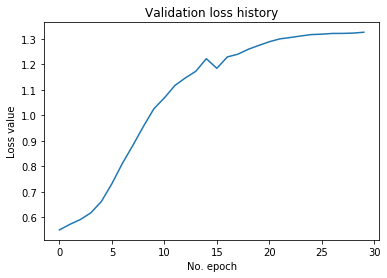

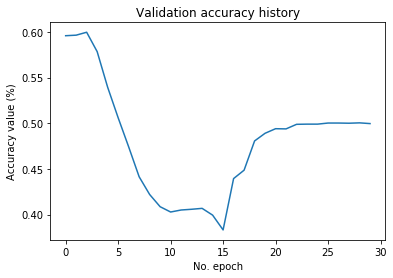

In [171]:
plt.plot(third_history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(third_history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

**Предсказания сети**

In [174]:
probability_model = tf.keras.Sequential([third_model, 
                                         tf.keras.layers.Softmax()])

In [176]:
predictions = probability_model.predict(padded_inputs_test)

In [182]:
predictions[1]

array([0.47917643, 0.5208236 ], dtype=float32)

In [183]:
np.argmax(predictions[1])

1

In [184]:
y_test[1]

1

In [203]:
for i in range(5):
    print(f' Предсказание: {np.argmax(predictions[i])}')
    print(f'Метка: {y_test[i]}')
    print('=================================================')

 Предсказание: 1
Метка: 0
 Предсказание: 1
Метка: 1
 Предсказание: 1
Метка: 1
 Предсказание: 1
Метка: 0
 Предсказание: 1
Метка: 1


**Попробуем добавить Dropout слой **

In [206]:
fourth_model = keras.Sequential([
    keras.layers.Embedding(10000, input_length=100, output_dim=15),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.30),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2)
])

fourth_model.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False, 
                                                             label_smoothing=0,
                                                             name='binary_crossentropy'),
                    metrics=['accuracy'])

fourth_model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 100, 15)           150000    
_________________________________________________________________
flatten_40 (Flatten)         (None, 1500)              0         
_________________________________________________________________
dense_132 (Dense)            (None, 128)               192128    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_134 (Dense)            (None, 2)                 130       
Total params: 350,514
Trainable params: 350,514
Non-trainable params: 0
_______________________________________________

In [207]:
fourth_history = fourth_model.fit(padded_inputs, y_train,
                                epochs=40,
                                batch_size=2000,
                                validation_split=0.2)

test_loss, test_acc = fourth_model.evaluate(padded_inputs_test,  y_test)

print('\nTest accuracy:', test_acc)

Epoch 1/40
10/10 [==============================] - 1s 34ms/step - loss: 2.4622 - accuracy: 0.5062 - val_loss: 0.9867 - val_accuracy: 0.4990
Epoch 2/40
10/10 [==============================] - 0s 24ms/step - loss: 0.9172 - accuracy: 0.4991 - val_loss: 0.7330 - val_accuracy: 0.5052
Epoch 3/40
10/10 [==============================] - 0s 28ms/step - loss: 0.7128 - accuracy: 0.5097 - val_loss: 0.6832 - val_accuracy: 0.4970
Epoch 4/40
10/10 [==============================] - 0s 24ms/step - loss: 0.6840 - accuracy: 0.5019 - val_loss: 0.6705 - val_accuracy: 0.5130
Epoch 5/40
10/10 [==============================] - 0s 25ms/step - loss: 0.6580 - accuracy: 0.5073 - val_loss: 0.6524 - val_accuracy: 0.4982
Epoch 6/40
10/10 [==============================] - 1s 66ms/step - loss: 0.6374 - accuracy: 0.4949 - val_loss: 0.6372 - val_accuracy: 0.5022
Epoch 7/40
10/10 [==============================] - 0s 24ms/step - loss: 0.6131 - accuracy: 0.5012 - val_loss: 0.6165 - val_accuracy: 0.5216
Epoch 8/40
10

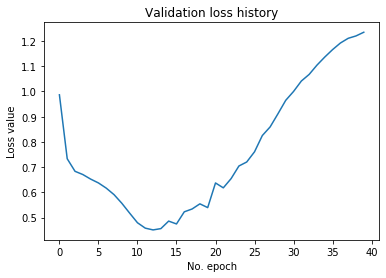

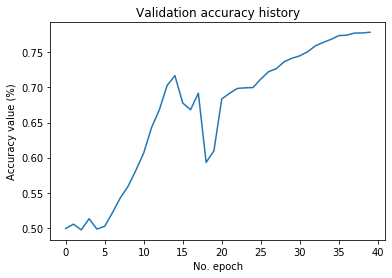

In [208]:
plt.plot(fourth_history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(fourth_history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

**Предсказания сети**

In [209]:
probability_model = tf.keras.Sequential([third_model, 
                                         tf.keras.layers.Softmax()])

In [210]:
predictions = probability_model.predict(padded_inputs_test)

In [211]:
predictions[1]

array([0.47917643, 0.5208236 ], dtype=float32)

In [212]:
np.argmax(predictions[1])

1

In [213]:
y_test[1]

1

In [214]:
for i in range(5):
    print(f' Предсказание: {np.argmax(predictions[i])}')
    print(f'Метка: {y_test[i]}')
    print('=================================================')

 Предсказание: 1
Метка: 0
 Предсказание: 1
Метка: 1
 Предсказание: 1
Метка: 1
 Предсказание: 1
Метка: 0
 Предсказание: 1
Метка: 1
